In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [73]:
sea_crime = pd.read_csv('data/sea_cleaned_crime.csv')
# sea_licenses = pd.read_csv('sea_lic_cleaned.csv')

In [74]:
sea_crime = sea_crime.drop('Unnamed: 0',axis=1)
# sea_licenses = sea_licenses.drop('Unnamed: 0',axis=1)

In [75]:
sea_crime.head()

,Primary Offense Description,Neighborhood,date_occurred,offense_category
0,BURGLARY-FORCE-RES,LAKEWOOD/SEWARD PARK,1975-12-16,burglary
1,SEXOFF-INDECENT LIBERTIES,UNKNOWN,1976-01-01,pub disorder
2,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK,1979-01-28,larceny
3,HOMICIDE-PREMEDITATED-WEAPON,BRIGHTON/DUNLAP,1981-08-22,murder
4,BURGLARY-FORCE-RES,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1981-02-14,burglary


In [76]:
sea_crime['date_occurred'] = pd.to_datetime(sea_crime['date_occurred'])

In [82]:
sea_crime['month_year'] = pd.to_datetime(sea_crime['date_occurred'], format='%Y-%m')


In [83]:
sea_crime['month_year'] = sea_crime['date_occurred'].dt.to_period('M')

In [84]:
sea_crime.head()

,Primary Offense Description,Neighborhood,date_occurred,offense_category,month_year
0,BURGLARY-FORCE-RES,LAKEWOOD/SEWARD PARK,1975-12-16,burglary,1975-12
1,SEXOFF-INDECENT LIBERTIES,UNKNOWN,1976-01-01,pub disorder,1976-01
2,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK,1979-01-28,larceny,1979-01
3,HOMICIDE-PREMEDITATED-WEAPON,BRIGHTON/DUNLAP,1981-08-22,murder,1981-08
4,BURGLARY-FORCE-RES,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1981-02-14,burglary,1981-02


In [85]:
type(sea_crime['month_year'][0])

pandas._libs.tslibs.period.Period

In [86]:
sea_crime['month_year'] = sea_crime['month_year'].astype(str)
sea_crime['month_year'] = pd.to_datetime(sea_crime['month_year'], format='%Y-%m')


In [87]:
sea_crime.head()

,Primary Offense Description,Neighborhood,date_occurred,offense_category,month_year
0,BURGLARY-FORCE-RES,LAKEWOOD/SEWARD PARK,1975-12-16,burglary,1975-12-01
1,SEXOFF-INDECENT LIBERTIES,UNKNOWN,1976-01-01,pub disorder,1976-01-01
2,THEFT-CARPROWL,CENTRAL AREA/SQUIRE PARK,1979-01-28,larceny,1979-01-01
3,HOMICIDE-PREMEDITATED-WEAPON,BRIGHTON/DUNLAP,1981-08-22,murder,1981-08-01
4,BURGLARY-FORCE-RES,ROXHILL/WESTWOOD/ARBOR HEIGHTS,1981-02-14,burglary,1981-02-01


In [88]:
type(sea_crime['month_year'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [89]:
sea_crime = sea_crime.loc[sea_crime['month_year'] >= '2010-01-01']


In [131]:
sea_crime['year'] = sea_crime['month_year'].dt.year

In [90]:
sea_crime['offense_category'].unique()

array(['drug-alc', 'larceny', 'robbery', 'other', 'burglary',
       'auto-theft', 'pub disorder', 'child', 'agg assault', 'murder',
       'white collar', 'sexual assault', 'arson',
       'other crimes against persons'], dtype=object)

In [132]:
sea_other = sea_crime.loc[sea_crime['offense_category'] == 'other']
# sea_theft_from_mtr_veh = sea_crime.loc[sea_crime['offense_category'] == 'theft from motor vehicle']
sea_other_crimes_agnst_per = sea_crime.loc[sea_crime['offense_category'] == 'other crimes against persons']
sea_drug_alc = sea_crime.loc[sea_crime['offense_category'] == 'drug-alc']
sea_auto_theft = sea_crime.loc[sea_crime['offense_category'] == 'auto theft']
sea_white_collar = sea_crime.loc[sea_crime['offense_category'] == 'white collar']
sea_burglary = sea_crime.loc[sea_crime['offense_category'] == 'burglary']
sea_agg_assault = sea_crime.loc[sea_crime['offense_category'] == 'agg assault']
sea_pub_disorder = sea_crime.loc[sea_crime['offense_category'] == 'pub disorder']
sea_robbery = sea_crime.loc[sea_crime['offense_category'] == 'robbery']
sea_arson = sea_crime.loc[sea_crime['offense_category'] == 'arson']
sea_sex_asslt = sea_crime.loc[sea_crime['offense_category'] == 'sexual assault']
sea_murder = sea_crime.loc[sea_crime['offense_category'] == 'murder']
sea_larceny = sea_crime.loc[sea_crime['offense_category'] == 'larceny']
sea_child = sea_crime.loc[sea_crime['offense_category'] == 'child']


In [92]:
arson_months = sea_arson['month_year'].unique()
arson_months.sort()

In [98]:
x = sea_crime['month_year'].sort_values()
x = x.unique()


In [102]:
x_murder = sea_murder['month_year'].unique()
x_murder.sort()

# Primary Categories

According to our basis article we'd expect to see an increase in Murder, Robbery, Larceny and maybe even Drug-Related crime, but we actually see pretty steady decrease downwards.

We'll need to see how the rates for these 5 categories change from 2012 to 2013.

2011 population = 622,532

2012 population = 635,974

2013 population = 654,176

--------

2011 murder/capita = 23/622,532 = 3.69 * 10^-5

2012 murder/capita = 24/635,974 = 3.77 * 10^-5

2013 murder/capita = 19/654,176 = 2.90 * 10^-5

------------

2011 robbery/capita = 1416/622,532 = 2.27 * 10^-3

2012 robbery/capita = 1442/635,974 = 2.27 * 10^-3

2013 robbery/capita = 1600/654,176 = 2.44 * 10^-3

-------

2011 burglary/capita = 6759/622,532 = 1.09 * 10^-2

2012 burglary/capita = 6527/635,974 = 1.03 * 10^-2

2013 burglary/capita = 7265/654,176 = 1.11 * 10^-2

---------

2011 larceny/capita = 21096/622,532 = 3.39 * 10^-2

2012 larceny/capita = 21532/635,974 = 3.39 * 10^-2

2013 larceny/capita = 24828/654,176 = 3.80 * 10^-2 

--------

2011 drug-alc/capita = 3094/622,532 = 5.00 * 10^-3

2012 drug-alc/capita = 2812/635,974 = 4.42 * 10^-3

2013 drug-alc/capita = 2459/654,176 = 3.76 * 10^-3

------------------------

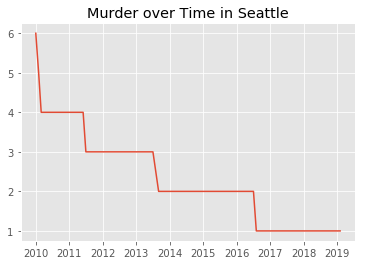

In [133]:
plt.title('Murder over Time in Seattle')
plt.plot(x_murder, sea_murder['month_year'].value_counts())

In [134]:
sea_murder['year'].value_counts()

2018    32
2017    28
2015    24
2012    24
2014    23
2011    23
2016    19
2013    19
2010    19
2019     4
Name: year, dtype: int64

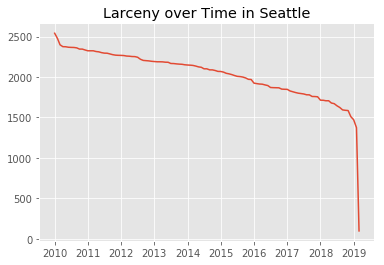

In [99]:
plt.title('Larceny over Time in Seattle')
plt.plot(x, sea_larceny['month_year'].value_counts())

In [135]:
sea_larceny['year'].value_counts()

2014    27587
2016    26453
2017    26164
2018    26115
2015    25998
2013    24828
2010    22111
2012    21532
2011    21096
2019     3606
Name: year, dtype: int64

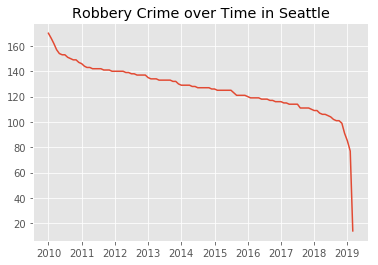

In [94]:
plt.title('Robbery Crime over Time in Seattle')

plt.plot(x,sea_robbery['month_year'].value_counts())

In [136]:
sea_robbery['year'].value_counts()

2018    1690
2013    1600
2014    1569
2016    1552
2015    1543
2017    1537
2012    1442
2010    1421
2011    1416
2019     260
Name: year, dtype: int64

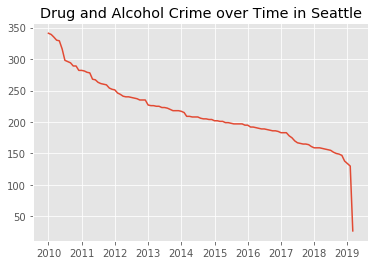

In [95]:
plt.title('Drug and Alcohol Crime over Time in Seattle')

plt.plot(x,sea_drug_alc['month_year'].value_counts())

In [137]:
sea_drug_alc['year'].value_counts()

2010    3647
2011    3094
2012    2812
2017    2655
2018    2480
2013    2459
2016    2247
2015    2141
2014    1915
2019     387
Name: year, dtype: int64

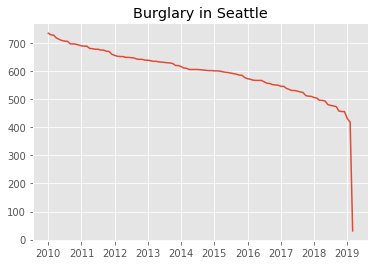

In [115]:
plt.title('Burglary in Seattle')
plt.plot(x,sea_burglary['month_year'].value_counts())

In [138]:
sea_burglary['year'].value_counts()

2018    8020
2017    7742
2015    7553
2016    7518
2013    7265
2014    7109
2011    6759
2012    6527
2010    6414
2019    1224
Name: year, dtype: int64

# Other Categories

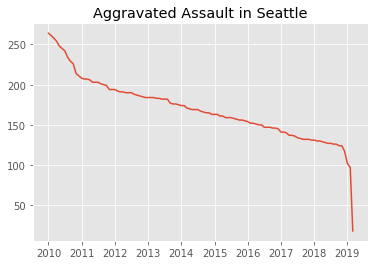

In [116]:
plt.title('Aggravated Assault in Seattle')
plt.plot(x, sea_agg_assault['month_year'].value_counts())

In [118]:
x_sex_asslt = sea_sex_asslt['month_year'].unique()
x_sex_asslt.sort()

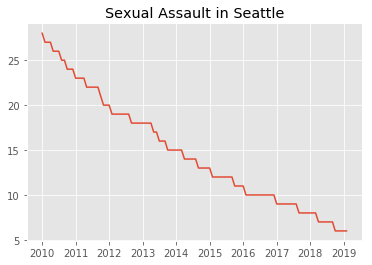

In [120]:
plt.title('Sexual Assault in Seattle')
plt.plot(x_sex_asslt, sea_sex_asslt['month_year'].value_counts())

In [96]:
x_white_collar = sea_white_collar['month_year'].unique()
x_white_collar.sort()

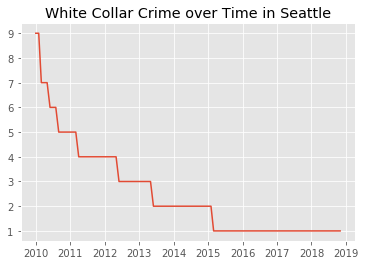

In [71]:
plt.title('White Collar Crime over Time in Seattle')

plt.plot(x_white_collar,sea_white_collar['month_year'].value_counts())


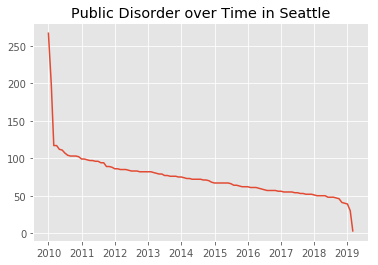

In [97]:
plt.title('Public Disorder over Time in Seattle')

plt.plot(x,sea_pub_disorder['month_year'].value_counts())


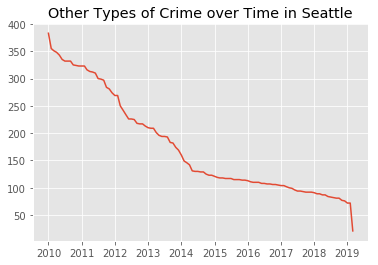

In [104]:
plt.title('Other Types of Crime over Time in Seattle')
plt.plot(x, sea_other['month_year'].value_counts())

In [130]:
sea_other_counts = sea_other['month_year'].value_counts()
sea_other_counts.sort_index()

2010-01-01     99
2010-02-01    110
2010-03-01    129
2010-04-01    115
2010-05-01    110
2010-06-01    121
2010-07-01    130
2010-08-01    104
2010-09-01    129
2010-10-01    131
2010-11-01    113
2010-12-01     91
2011-01-01    114
2011-02-01     92
2011-03-01     72
2011-04-01    100
2011-05-01     83
2011-06-01     96
2011-07-01     72
2011-08-01    102
2011-09-01    108
2011-10-01    107
2011-11-01     84
2011-12-01     93
2012-01-01     87
2012-02-01     87
2012-03-01     89
2012-04-01    105
2012-05-01     77
2012-06-01     76
             ... 
2016-10-01    250
2016-11-01    218
2016-12-01    209
2017-01-01    269
2017-02-01    242
2017-03-01    343
2017-04-01    297
2017-05-01    310
2017-06-01    274
2017-07-01    281
2017-08-01    332
2017-09-01    299
2017-10-01    325
2017-11-01    312
2017-12-01    313
2018-01-01    351
2018-02-01    335
2018-03-01    300
2018-04-01    348
2018-05-01    323
2018-06-01    332
2018-07-01    355
2018-08-01    323
2018-09-01    324
2018-10-01

In [106]:
x_other_agnst = sea_other_crimes_agnst_per['month_year'].unique()
x_other_agnst.sort()

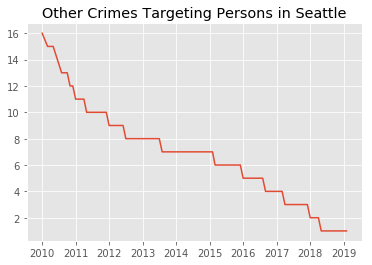

In [107]:
plt.title('Other Crimes Targeting Persons in Seattle')
plt.plot(x_other_agnst, sea_other_crimes_agnst_per['month_year'].value_counts())

Seattle was the first state to legalize back in 2012.  If we're looking at the 